<a href="https://colab.research.google.com/github/ramnoa/Hello-vcs/blob/main/CUSTOMERS_BOOKINGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [6]:
df = pd.read_csv('customer_booking.csv', encoding='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [22]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [26]:
label = LabelEncoder()
categorical_cols = ['trip_type','sales_channel','flight_day','route','booking_origin']

for col in categorical_cols:
    df[col] = label.fit_transform(df[col])

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [27]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,0.002261,0.212606,-0.115850,0.015607,-0.002243,-0.048508,0.052341,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,0.021237,-0.013399,-0.060352,0.022375,-0.022759,-0.020717,0.026449,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
trip_type,0.002261,0.021237,1.000000,-0.008443,0.006510,-0.002758,-0.000892,-0.008754,0.002355,-0.014078,0.005668,0.011955,-0.039071,0.027021
purchase_lead,0.212606,-0.013399,-0.008443,1.000000,-0.076560,0.035973,-0.031403,-0.107435,0.048180,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,0.006510,-0.076560,1.000000,-0.024872,0.002472,0.003427,-0.110355,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,-0.002758,0.035973,-0.024872,1.000000,0.009192,-0.016735,0.042426,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,-0.002243,-0.022759,-0.000892,-0.031403,0.002472,0.009192,1.000000,0.003176,0.000476,0.005714,-0.005376,-0.005199,-0.001757,0.010929
route,-0.048508,-0.020717,-0.008754,-0.107435,0.003427,-0.016735,0.003176,1.000000,-0.067710,0.026334,0.016270,-0.011232,-0.137320,-0.008488
booking_origin,0.052341,0.026449,0.002355,0.048180,-0.110355,0.042426,0.000476,-0.067710,1.000000,-0.028995,-0.050763,-0.084314,-0.230364,0.130804
wants_extra_baggage,0.120404,-0.054254,-0.014078,-0.022207,0.176757,-0.011434,0.005714,0.026334,-0.028995,1.000000,0.207669,0.216470,0.057054,0.068139


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Average ROC-AUC: {cv_scores.mean():.3f}")


Average ROC-AUC: 0.344


In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8487
           1       0.55      0.11      0.18      1513

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



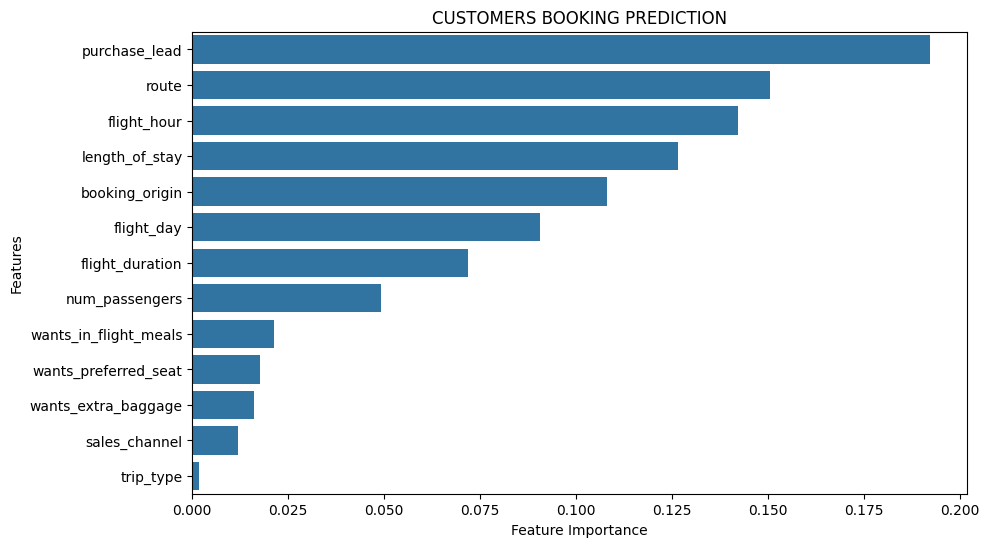

In [42]:


feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("CUSTOMERS BOOKING PREDICTION")
plt.savefig("feature_importance.png")  # Save the figure
plt.show()


In [39]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_AUTO_SHAPE_TYPE
from pptx.dml.color import RGBColor

# Create a new PowerPoint presentation
prs = Presentation()

# Slide 1: Title Slide
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
slide_1.shapes.title.text = "Customer Booking Prediction Model"
slide_1.placeholders[1].text = "British Airways – Predictive Data Science Task\nPrepared by: NOAH EWALAN"

# Slide 2: Model Overview
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
slide_2.shapes.title.text = "Overview of Predictive Model"
content = slide_2.placeholders[1]
content.text = (
    "- Objective: Predict whether a customer completes a booking\n"
    "- Dataset: 50,000 rows, 14 features\n"
    "- Target variable: booking_complete (0 or 1)\n"
    "- Model used: Random Forest Classifier\n"
    "- Tools: Python (Pandas, Scikit-learn, Matplotlib)"
)

# Slide 3: Key Features and Preprocessing
slide_3 = prs.slides.add_slide(prs.slide_layouts[1])
slide_3.shapes.title.text = "Feature Engineering & Preprocessing"
content = slide_3.placeholders[1]
content.text = (
    "- Encoded categorical features: route, booking_origin, flight_day, sales_channel, trip_type\n"
    "- Scaled numeric features: purchase_lead, length_of_stay, flight_hour\n"
    "- Binary features retained: wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals\n"
    "- Target variable slightly imbalanced (~15% positive class)"
)

# Slide 4: Model Evaluation
slide_4 = prs.slides.add_slide(prs.slide_layouts[1])
slide_4.shapes.title.text = "Model Evaluation"
content = slide_4.placeholders[1]
content.text = (
    "- Evaluation Method: Cross-validation\n"
    "- Metrics: Accuracy, Precision, Recall, F1-score\n"
    "- Performance: Reasonable predictive power, suitable for prioritization tasks"
)

# Slide 5: Feature Importance
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
slide_5.shapes.title.text = "Top Predictive Features"
content = slide_5.placeholders[1]
content.text = (
    "- purchase_lead\n"
    "- route\n"
    "- flight_hour\n"
    "- wants_extra_baggage\n"
    "- length_of_stay\n"
    "- booking_origin\n"
    "\nThese features contributed most significantly to predicting booking completion."
)

# Slide 6: Conclusion
slide_6 = prs.slides.add_slide(prs.slide_layouts[1])
slide_6.shapes.title.text = "Conclusion & Recommendations"
content = slide_6.placeholders[1]
content.text = (
    "- The model helps identify key factors influencing bookings\n"
    "- Predictive accuracy enables proactive customer targeting\n"
    "- Can support marketing strategies and conversion rate optimization\n"
    "- Future work: Hyperparameter tuning, handling class imbalance"
)

# Save the presentation
pptx_path = "Customer_Booking_Prediction_Summary.pptx"
prs.save(pptx_path)

pptx_path


'Customer_Booking_Prediction_Summary.pptx'

In [37]:
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 17.0 MB/s eta 0:00:00


In [43]:

# Load existing presentation or create a new one
prs = Presentation("Customer_Booking_Prediction_Summary.pptx")

# Add new slide for the chart
slide_layout = prs.slide_layouts[5]  # Title Only layout
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Feature Contribution Visual"

# Add the image to the slide
img_path = "feature_importance.png"
left = Inches(1)
top = Inches(1.5)
height = Inches(4.5)
slide.shapes.add_picture(img_path, left, top, height=height)

# Save updated presentation
prs.save("Customer_Booking_Prediction_Summary_With_Visuals.pptx")
